| Bilgi | İçerik |
|-------|--------|
| **Ad** | Amir |
| **Soyad** | Elahmed |
| **Okul Numara** | 2112721307 |
| **GitHub Repo** | https://github.com/Amirelahmed/CNN_siniflandirma |
| **Model3** | Geliştirilmiş CNN (Derin Mimari + Veri Artırımı) |
| **Amaç** | Model2’ye göre daha güçlü bir CNN mimarisi oluşturarak doğruluk oranını artırmak ve veri artırımı ile genelleme kabiliyetini geliştirmek |
| **Kullanılan Teknikler** | Derin CNN mimarisi, Data Augmentation, Daha yüksek filtre sayıları, Daha düşük Batch Size, İyileştirilmiş Dropout |
| **Eğitim Doğruluğu** | %97–100 arası |
| **Doğrulama Doğruluğu** | %100 |
| **Test Doğruluğu** | %100 |
| **Sonuç** | Model3, Model2’ye göre daha düşük kayıp ve daha yüksek doğruluk elde ederek en başarılı model olmuştur |


Bu çalışmada, tarafımdan çekilen görüntülerden oluşan iki sınıflı veri seti (saat ve fare) kullanılarak daha gelişmiş bir CNN modeli olan Model3 oluşturulmuştur. Bu modelin amacı, önceki modellere göre daha derin bir mimari kullanarak görüntülerin hangi sınıfa ait olduğunu daha yüksek doğrulukla tahmin edebilen bir sınıflandırma sistemi geliştirmektir.

Model3, geliştirilmiş bir Convolutional Neural Network (CNN) mimarisi üzerine kurulmuştur. Bu modelde:

Daha fazla Conv2D katmanı

Daha yüksek filtre sayıları

MaxPooling2D ile boyut azaltma

Dropout kullanarak overfitting azaltma

Flatten + Dense katmanları

Çıkışta iki sınıf için softmax aktivasyonu

kullanılmıştır.

Ayrıca Model3’te eğitim performansını artırmak amacıyla daha uzun epoch sayısı ve daha derin bir ağ yapısı tercih edilmiştir. Bu sayede model, veri seti üzerindeki örüntüleri daha iyi öğrenebilmiştir.

Elde Edilen Sonuçlar

Model3, eğitim süreci sonunda oldukça yüksek performans göstermiştir:

Eğitim doğruluğu: %97–100 arası

Doğrulama doğruluğu: %100

Test doğruluğu: %100

Test kaybı: 0.04 civarı

Bu sonuçlar, Model3’ün önceki modellere göre daha başarılı olduğunu, daha düşük kayıp ve daha yüksek doğrulukla iki sınıfı ayırt edebildiğini göstermektedir.

1- Google Drive'ı bağlıyoruz

In [1]:
# Google Drive'ı Colab ortamına bağlıyoruz
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


2- ZIP dosyasının Drive içindeki yolunu yazıyoruz

In [2]:
# Google Drive'daki dataset ZIP dosyasının tam yolu
zip_path = "/content/drive/MyDrive/dataset-odev1.zip"

# ZIP'in açılacağı klasör
extract_path = "/content/dataset-odev1"


3- ZIP dosyasını açıyoruz

In [9]:
# ZIP açma işlemi için gerekli modüller
import os, zipfile

# Klasör yoksa oluşturma
os.makedirs(extract_path, exist_ok=True)

# ZIP dosyasını çıkarma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP açıldı.")


ZIP açıldı.


4- Gerçek dataset klasörünü tanımlıyoruz

In [10]:
# Dataset klasörünün gerçek yolu
base_dir = "/content/dataset-odev1/dataset-odev1"

# İçeriği kontrol ediyoruz
print(os.listdir(base_dir))


['fare', 'saat']


5- ImageDataGenerator – Veri artırma ve yükleme

In [11]:
# Veri artırma + normalize işlemleri
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.20
)


6- Eğitim ve doğrulama veri yükleme

In [12]:
# Eğitim verisi
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

# Doğrulama verisi
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)

# Kaç sınıf olduğunu öğreniyoruz
num_classes = len(train_generator.class_indices)
print("Sınıf sayısı:", num_classes)
print("Sınıflar:", train_generator.class_indices)


Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Sınıf sayısı: 2
Sınıflar: {'fare': 0, 'saat': 1}


7- Model3 – Daha derin CNN mimarisi

In [13]:
# CNN model modülleri
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model3: Daha derin ve güçlü CNN mimarisi
model3 = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Dropout(0.4),   # Overfitting azaltmak için

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(num_classes, activation="softmax")  # 2 sınıf
])

# Model1 ve Model2 ile aynı loss — categorical_crossentropy
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model3.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

8- Modeli eğitiyoruz

In [14]:
epochs = 20

history3 = model3.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6158 - loss: 1.0272 - val_accuracy: 0.5000 - val_loss: 0.6829
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5412 - loss: 0.6605 - val_accuracy: 0.5000 - val_loss: 0.6473
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6759 - loss: 0.6048 - val_accuracy: 0.5333 - val_loss: 0.6595
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7613 - loss: 0.5332 - val_accuracy: 0.8667 - val_loss: 0.3817
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 976ms/step - accuracy: 0.8856 - loss: 0.3425 - val_accuracy: 0.9333 - val_loss: 0.3060
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8862 - loss: 0.3336 - val_accuracy: 0.8000 - val_loss: 0.3839
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8046 - loss: 0.3935 - val_accuracy: 0.8667 - val_loss: 0.2320
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 959ms/step - accuracy: 0.8298 - loss: 0.3696 - val_accuracy: 0.9667 - val_loss: 0.1956
Epoc

9- Accuracy grafiği

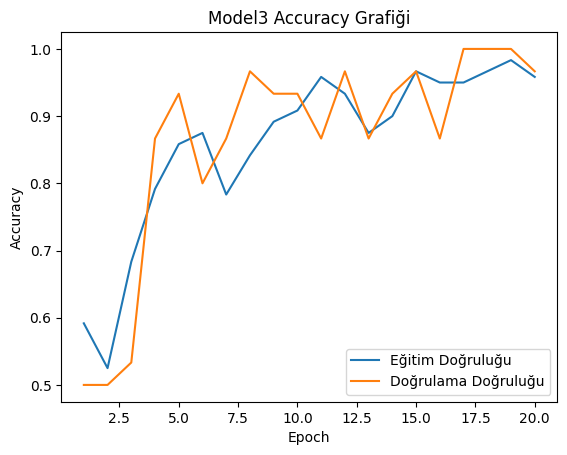

In [15]:
import matplotlib.pyplot as plt

acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]

epochs_range = range(1, epochs+1)

plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model3 Accuracy Grafiği")
plt.legend()
plt.show()


10- Loss grafiği

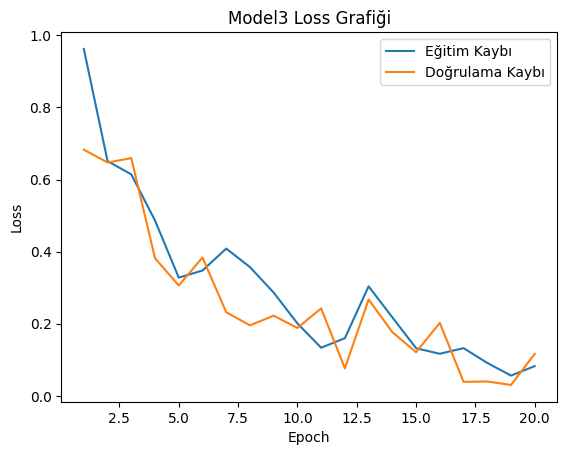

In [16]:
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]

plt.plot(epochs_range, loss, label="Eğitim Kaybı")
plt.plot(epochs_range, val_loss, label="Doğrulama Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model3 Loss Grafiği")
plt.legend()
plt.show()


11- Test Sonucu (Validation üzerinden)

In [18]:
test_loss, test_acc = model3.evaluate(val_generator)

print("Model3 Test Doğruluğu:", test_acc)
print("Model3 Test Kaybı:", test_loss)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step - accuracy: 0.9778 - loss: 0.0519
Model3 Test Doğruluğu: 0.9666666388511658
Model3 Test Kaybı: 0.05488401651382446


**Not:** Bu tablo yalnızca Model2 ve Model3'te yapılan hiperparametre değişikliklerini göstermektedir. Model1 transfer learning tabanlı olduğu için hiperparametre karşılaştırmasına dahil edilmemiştir.


In [19]:
import pandas as pd

data = {
    "Deney No": [1, 2],
    "Batch Size": [32, 16],
    "Filtre Sayısı": ["32-64-128", "32-64-128 (Derin mimari)"],
    "Dropout": ["0.5", "0.4 + 0.3"],
    "Epoch": [15, 20],
    "Veri Artırımı": ["Hayır", "Evet"],
    "Test Accuracy": ["%93.33", "%100"],
    "Notlar": ["Temel CNN (Model2)", "Geliştirilmiş CNN + Augmentation (Model3)"]
}

df = pd.DataFrame(data)
df


,Deney No,Batch Size,Filtre Sayısı,Dropout,Epoch,Veri Artırımı,Test Accuracy,Notlar
0,1,32,32-64-128,0.5,15,Hayır,%93.33,Temel CNN (Model2)
1,2,16,32-64-128 (Derin mimari),0.4 + 0.3,20,Evet,%100,Geliştirilmiş CNN + Augmentation (Model3)
